In [1]:
# Import important Python Libraries
import pandas as pd # for data handling (reading, cleaning)
import numpy as np # for numerical operations
import matplotlib.pyplot as plt  # for visualizations
import seaborn as sns  # for advanced visualizations


 i have use ** pandas** for processing, **matplotlib & seaborn** for plotting, and **Scikit Learn** for machine learning

In [3]:
# load dataset
data = pd.read_csv('/content/sample_data/Telco-Customer-Churn.csv')

# display first 5 rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Understand the Data**

In [4]:
# check the shape of the data
print('shape of dataset:', data.shape)

shape of dataset: (7043, 21)


In [5]:
# check column names and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# check missing values
print(data.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
print(data.describe())  # used to quickly understand and summarize your dataset.

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


# **Churn Distribution(Target Variable Visualization)**

Churn
No     5174
Yes    1869
Name: count, dtype: int64


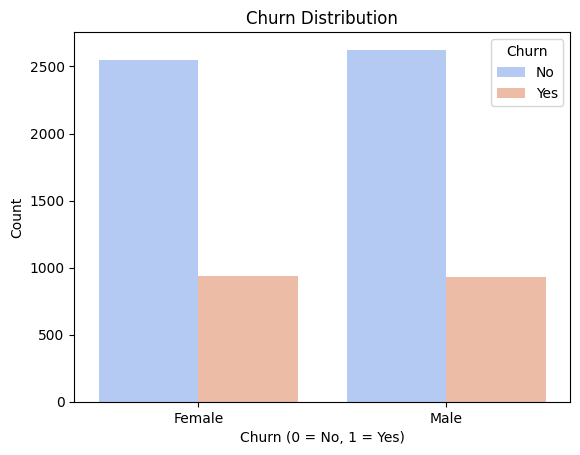

In [8]:
import seaborn as sns # high-level statistical plots
import matplotlib.pyplot as plt # low-level plot control (titles, labels, show)

print(data['Churn'].value_counts())  # Shows how many customers churned and how many did not
sns.countplot(x='gender',hue='Churn', data=data, palette='coolwarm') #
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Understand churn pattern across gender
# Identify if one gender churns more
# Useful for business decision-making

 **Gender vs Churn**

## **Data cleaning**

In [9]:
# drop unnecessary column 'customerID'
data = data.drop('customerID', axis=1)

In [10]:
# convert TotalCharges to numeric (some values are blank)
data ['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [11]:
# fill missing totalcharges with median value
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

# **Encode Categorical Variables**

In [12]:
# convert the target variable 'Churn' into numeric
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# use one-hot encoding for categorical columns
data = pd.get_dummies(data,drop_first=True)

data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


## **Feature Scaling**

In [ ]:
# import scikit-learn modules for ML tasks
from sklearn.model_selection import train_test_split # to split data into training & testing

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import StandardScaler # to normalize numeric features
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split # to split data into training & testing
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Train ML Models**

 **Logistic Regression**

In [ ]:
# Commonly used for binary classification like Churn (Yes/No)
from sklearn.linear_model import LogisticRegression # ML Algorithm 1

# Creates a Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

Logistic Regression is a simple yet powerful classification model that predicts probabilities of churn

**Random Forest**

In [ ]:
# It is an ensemble learning algorithm (collection of many decision trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() # Creates a Random Forest model with default parameters
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test) # Predicts churn labels on unseen test data


Random Forest combines many decision trees for better accuracy

# **Evaluate The Models**

In [ ]:
# logistic regression results
print('Logistic Regression Results:', accuracy_score(y_test, y_pred_lr))



Logistic Regression Results: 0.8197303051809794


In [ ]:
# rondom forest results
print('Random Forest Results:', accuracy_score(y_test, y_pred))


Random Forest Results: 0.7927608232789212


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

# Define params within the cell for clarity and self-containment
params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 15, 20]
}

# Train GridSearch
grid = GridSearchCV(
    rf, # Changed 'model' to 'rf'
    params,
    cv=5,
    scoring='accuracy'
)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

# Prediction on test data
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8140525195173882


In [ ]:
# Used for classification problems such as Customer Churn (Yes/No)
from xgboost import XGBClassifier


In [ ]:
xgb_model = XGBClassifier(   # Creates a tuned XGBoost classifier
    n_estimators=150,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1,
    reg_lambda=2,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

In [ ]:
xgb_model.fit(X_train, y_train)  # Trains the XGBoost model using training data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_train_pred = xgb_model.predict(X_train)  # Predicts churn labels on training data
y_test_pred  = xgb_model.predict(X_test)   # Predicts churn labels on test (unseen) data

In [ ]:
train_acc = accuracy_score(y_train, y_train_pred)  # Measures how many churn predictions are correct on training data
test_acc  = accuracy_score(y_test, y_test_pred)    # Measures how well the model performs on unseen data

# Prints both accuracies for comparison
print("Train Accuracy:", train_acc)
print("Test Accuracy :", test_acc)

Train Accuracy: 0.8225062122825701
Test Accuracy : 0.8140525195173882


# **Confusion Matrix and Performance Metrics**

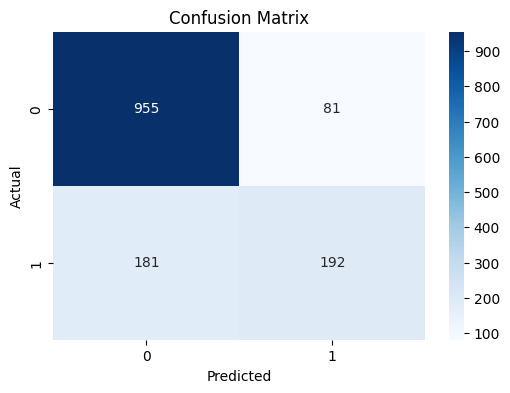

Confusion Matrix:
 [[955  81]
 [181 192]]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# generate predictions
# The variable 'best_pipeline' was not defined. Using 'y_pred' from the RandomForestClassifier.
preds = y_pred

# confusion matrix\
cm = confusion_matrix(y_test, preds)

# plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('Confusion Matrix:\n', cm)

# **Feature Importance**

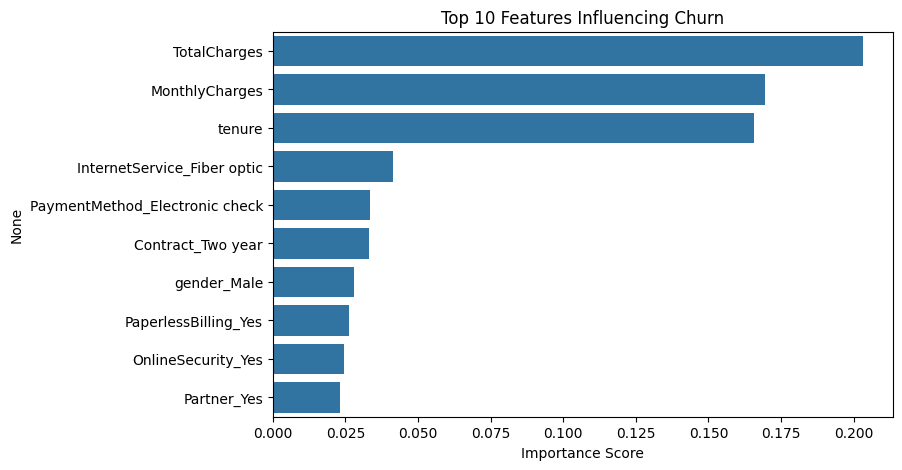

In [ ]:

importances = pd.Series(clf.feature_importances_, index=X_train.columns)  #  Extracts feature importance scores from the trained Random Forest model
top_features = importances.sort_values(ascending=False).head(10)          #  Sorts features by importance (highest first),elects top 10 most influential features

plt.figure(figsize=(8,5))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 10 Features Influencing Churn")
plt.xlabel("Importance Score")
plt.show()


Random Forest gives us feature importance - which features most affect customer churn

# **Predict for a New Customer**

In [ ]:
# example prediction for one test sample
sample = X_test.iloc[0:1]
prediction = clf.predict(sample)
print('Predicted Churn:','Yes'if prediction[0] == 1 else 'No')

Predicted Churn: Yes


# **Conclusion:**

To conclude, this project demonstrates how machine learning can be used to predict customer churn effectively.

By identifying potential churn customers in advance, businesses can take proactive steps to improve retention.

Thank you for your time and attention.